In [72]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models  
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [7]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

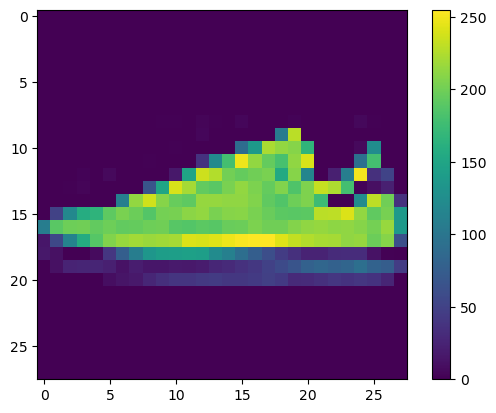

In [10]:
plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.grid(False)

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(135, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [65]:
mod=model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4647 - accuracy: 0.8419
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4669 - accuracy: 0.8417
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4572 - accuracy: 0.8455
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4581 - accuracy: 0.8460
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4556 - accuracy: 0.8475
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4592 - accuracy: 0.8461
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4561 - accuracy: 0.8488
Epoch 8/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4574 - accuracy: 0.8452
Epoch 9/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4529 - accuracy: 0.8486
Epoch 10/10
1875/1875 [==============================] - 28s 15m

1/1 [==============================] - 0s 24ms/step


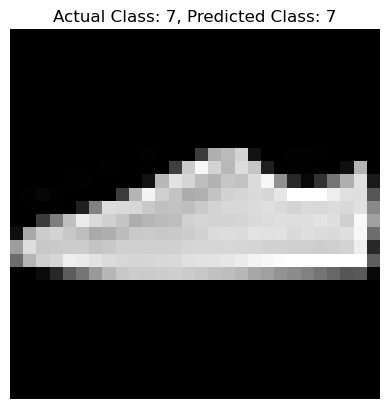

In [70]:
index = np.random.randint(0, len(test_labels))
image = test_images[index]
label = test_labels[index]
probabilities = model.predict(image)
predicted_class = np.argmax(probabilities)
plt.imshow(test_images[index], cmap='gray')
plt.title(f'Actual Class: {label}, Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()

<AxesSubplot:>

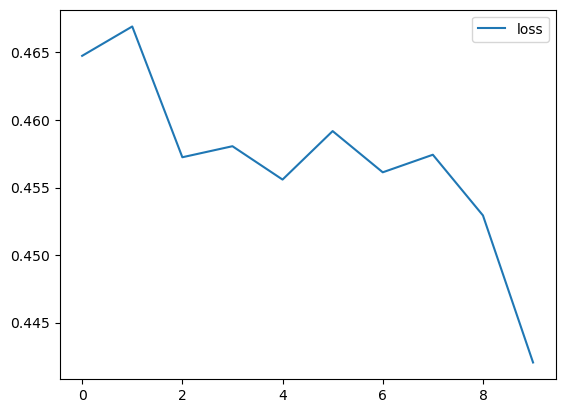

In [74]:
loss_df = pd.DataFrame(mod.history)

loss_df.loc[:,['loss']].plot()

<AxesSubplot:>

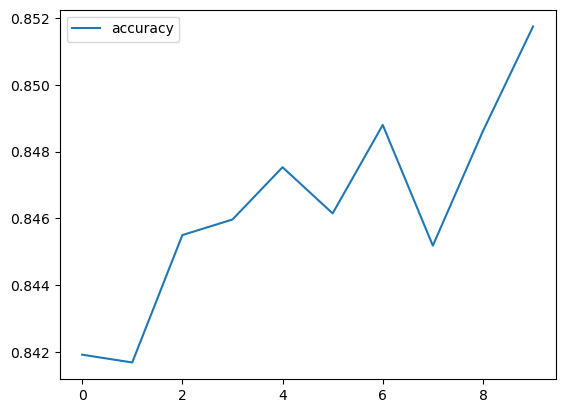

In [75]:
acc_df = pd.DataFrame(mod.history)

acc_df.loc[:,['accuracy']].plot()